| الاسم الكامل             | الرقم الأكاديمي | البرنامج         |
|--------------------------|------------------|------------------|
|  Elsadat Ezzeat Rajab      | 20220112          | IOT          |

In [1]:
# Install paddlepaddle, then reinstall paddleocr to ensure compatibility, and install compatible version of langchain
!pip install paddlepaddle
!pip install --upgrade paddleocr
!pip install langchain==0.0.354


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!pip install pdf2image

In [2]:
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 0s (405 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121689 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
import os
from pdf2image import convert_from_path

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
PDF_FOLDER = "/content/drive/MyDrive/Vison_Data"  # غيره على حسب مكان ملفاتك
OUTPUT_FOLDER = "/content/drive/MyDrive/Vison_Data_pdf_images"    # هنا الصور هتتحفظ
import os
os.makedirs(OUTPUT_FOLDER, exist_ok=True)


In [6]:
from pdf2image import convert_from_path

for pdf_file in os.listdir(PDF_FOLDER):
    if pdf_file.lower().endswith(".pdf"):
        pdf_path = os.path.join(PDF_FOLDER, pdf_file)

        pdf_name = os.path.splitext(pdf_file)[0]
        pdf_output_dir = os.path.join(OUTPUT_FOLDER, pdf_name)
        os.makedirs(pdf_output_dir, exist_ok=True)

        print(f"📄 Processing: {pdf_file}")

        images = convert_from_path(pdf_path, dpi=300)

        for i, img in enumerate(images):
            img_path = os.path.join(pdf_output_dir, f"page_{i+1}.png")
            img.save(img_path, "PNG")

        print(f"✅ Saved {len(images)} pages\n")


📄 Processing: أدهم خالد سعيد.pdf
✅ Saved 2 pages

📄 Processing: عقد موقع وتطبيق آفاق ستورز.pdf
✅ Saved 11 pages



In [9]:
import os
import cv2
import numpy as np
from paddlex import create_model

# فولدر الصور الناتجة من الـ PDF
OUTPUT_FOLDER = "/content/drive/MyDrive/Vison_Data_pdf_images"  # غيره حسب مكانك

# فولدر لحفظ الصور بعد رسم الـ boxes
DRAW_FOLDER = "/content/drive/MyDrive/Vison_Data_pdf_images_boxes"
os.makedirs(DRAW_FOLDER, exist_ok=True)

# Initialize detector once for efficiency
detector = create_model("PP-OCRv5_server_det")

def detect_and_draw(image_path, output_path):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Predict using the pre-initialized detector
    results = detector.predict(image_path)

    # Draw bounding boxes
    for result in results:
        boxes = result["dt_polys"]
        for box in boxes:
            # Convert float coordinates to integers for cv2.polylines
            int_box = np.array(box, dtype=np.int32)
            # Draw polygon on the image (BGR format, so (0,0,255) is red)
            cv2.polylines(img, [int_box], isClosed=True, color=(0, 0, 255), thickness=2)

    # Save the image with drawn boxes
    cv2.imwrite(output_path, img)
    print(f"  ✓ Saved image with boxes to {output_path}")


# Loop على كل PDF folder
for pdf_name in os.listdir(OUTPUT_FOLDER):
    pdf_folder = os.path.join(OUTPUT_FOLDER, pdf_name)
    if os.path.isdir(pdf_folder):
        print(f"Processing PDF: {pdf_name}")

        # Loop على كل صفحة
        for img_file in os.listdir(pdf_folder):
            if img_file.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(pdf_folder, img_file)

                # فولدر الحفظ لكل PDF
                save_folder = os.path.join(DRAW_FOLDER, pdf_name)
                os.makedirs(save_folder, exist_ok=True)
                save_path = os.path.join(save_folder, img_file)

                # Call detect_and_draw
                detect_and_draw(img_path, save_path)


Checking connectivity to the model hosters, this may take a while. To bypass this check, set `DISABLE_MODEL_SOURCE_CHECK` to `True`.
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_server_det`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.pdiparams:   0%|          | 0.00/87.9M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


Processing PDF: أدهم خالد سعيد
  ✓ Saved image with boxes to /content/drive/MyDrive/Vison_Data_pdf_images_boxes/أدهم خالد سعيد/page_1.png
  ✓ Saved image with boxes to /content/drive/MyDrive/Vison_Data_pdf_images_boxes/أدهم خالد سعيد/page_2.png
Processing PDF: عقد موقع وتطبيق آفاق ستورز
  ✓ Saved image with boxes to /content/drive/MyDrive/Vison_Data_pdf_images_boxes/عقد موقع وتطبيق آفاق ستورز/page_1.png
  ✓ Saved image with boxes to /content/drive/MyDrive/Vison_Data_pdf_images_boxes/عقد موقع وتطبيق آفاق ستورز/page_2.png
  ✓ Saved image with boxes to /content/drive/MyDrive/Vison_Data_pdf_images_boxes/عقد موقع وتطبيق آفاق ستورز/page_3.png
  ✓ Saved image with boxes to /content/drive/MyDrive/Vison_Data_pdf_images_boxes/عقد موقع وتطبيق آفاق ستورز/page_4.png
  ✓ Saved image with boxes to /content/drive/MyDrive/Vison_Data_pdf_images_boxes/عقد موقع وتطبيق آفاق ستورز/page_5.png
  ✓ Saved image with boxes to /content/drive/MyDrive/Vison_Data_pdf_images_boxes/عقد موقع وتطبيق آفاق ستورز

In [14]:
import os
OUTPUT_FOLDER = "/content/drive/MyDrive/Vison_Data_pdf_images"  # الصور الناتجة من PDF
ROIS_FILE_FOLDER = "/content/drive/MyDrive/Vison_Data_pdf_rois"
os.makedirs(ROIS_FILE_FOLDER, exist_ok=True)

In [12]:
for pdf_name in os.listdir(OUTPUT_FOLDER):
    pdf_folder = os.path.join(OUTPUT_FOLDER, pdf_name)
    if os.path.isdir(pdf_folder):
        print(f"Processing PDF: {pdf_name}")

        all_rois = []
        all_bboxes = []

        for img_file in os.listdir(pdf_folder):
            if img_file.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(pdf_folder, img_file)
                print(f"  🖼 Processing image: {img_file}")

                # Load image
                import cv2
                import numpy as np
                from paddlex import create_model
                detector = create_model("PP-OCRv5_server_det")
                img = cv2.imread(img_path)
                h_img, w_img = img.shape[:2]

                # Predict
                results = detector.predict(img_path)

                for result in results:
                    boxes = result["dt_polys"]
                    for box in boxes:
                        pts = np.array(box, dtype=np.int32)
                        x, y, w, h = cv2.boundingRect(pts)
                        x1 = max(x, 0)
                        y1 = max(y, 0)
                        x2 = min(x + w, w_img)
                        y2 = min(y + h, h_img)
                        roi = img[y1:y2, x1:x2]
                        all_rois.append(roi)
                        all_bboxes.append((x1, y1, x2, y2))

        # Save single file per PDF
        output_file = os.path.join(ROIS_FILE_FOLDER, f"{pdf_name}_rois.npz")
        np.savez(output_file, images=np.array(all_rois, dtype=object), bboxes=np.array(all_bboxes))
        print(f"✓ Saved {len(all_rois)} ROIs into {output_file}\n")


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


Processing PDF: أدهم خالد سعيد
  🖼 Processing image: page_1.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_2.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


✓ Saved 34 ROIs into /content/drive/MyDrive/Vison_Data_pdf_rois/أدهم خالد سعيد_rois.npz

Processing PDF: عقد موقع وتطبيق آفاق ستورز
  🖼 Processing image: page_1.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_2.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_3.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_4.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_5.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_6.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_7.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_8.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_9.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_10.png


Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.


  🖼 Processing image: page_11.png
✓ Saved 336 ROIs into /content/drive/MyDrive/Vison_Data_pdf_rois/عقد موقع وتطبيق آفاق ستورز_rois.npz



In [15]:
import os
import numpy as np

def crop_rois_to_single_file(dummy_output_image_name, output_npz_filename):
    """
    Combines all individual ROI .npz files from ROIS_FILE_FOLDER into a single .npz file.
    The dummy_output_image_name argument is ignored, as the primary goal is
    to consolidate ROI data into a single NPZ archive for subsequent steps.
    """
    combined_rois = []
    combined_bboxes = []

    # ROIS_FILE_FOLDER is defined in cell _Bc9nQuEwHz0 and needs to be accessible.
    # Using the global variable as it's already set in the notebook state.
    global ROIS_FILE_FOLDER

    if not os.path.exists(ROIS_FILE_FOLDER):
        print(f"Error: ROIS_FILE_FOLDER '{ROIS_FILE_FOLDER}' does not exist.")
        return

    for filename in os.listdir(ROIS_FILE_FOLDER):
        if filename.endswith("_rois.npz"):
            npz_path = os.path.join(ROIS_FILE_FOLDER, filename)
            try:
                data = np.load(npz_path, allow_pickle=True)
                if "images" in data and "bboxes" in data:
                    combined_rois.extend(data["images"])
                    combined_bboxes.extend(data["bboxes"])
                else:
                    print(f"Warning: {npz_path} does not contain 'images' or 'bboxes' keys.")
            except Exception as e:
                print(f"Error loading {npz_path}: {e}")

    if combined_rois:
        # Save the combined data to the specified output_npz_filename in the current working directory
        np.savez(output_npz_filename, images=np.array(combined_rois, dtype=object), bboxes=np.array(combined_bboxes))
        print(f"✓ Successfully combined {len(combined_rois)} ROIs into {output_npz_filename}")
    else:
        print("No ROIs found to combine.")

# Call the function. Assuming 'output.jpg' is a placeholder or irrelevant for this specific consolidation task.
# The 'all_rois.npz' is the target file for the combined ROIs.
crop_rois_to_single_file("output.jpg", "all_rois.npz")

✓ Successfully combined 370 ROIs into all_rois.npz


In [16]:
rois_file = "all_rois.npz"   # غير الاسم لو مختلف

data = np.load(rois_file, allow_pickle=True)

roi_images = data["images"]
roi_bboxes = data["bboxes"]

print(f"✓ Loaded {len(roi_images)} ROIs")


✓ Loaded 370 ROIs


In [17]:
from paddlex import create_model

recognizer = create_model("arabic_PP-OCRv5_mobile_rec")

ocr_results = []

for i, roi in enumerate(roi_images):

    # Skip invalid crops
    if roi is None or roi.size == 0:
        continue

    # OCR Recognition (NO detection)
    rec_generator = recognizer.predict(roi)

    text = ""
    score = 0.0

    try:
        # Get the first (and likely only) result from the generator
        rec = next(rec_generator)
        text = rec["rec_text"]
        score = rec["rec_score"]
    except StopIteration:
        # No recognition result found for this ROI
        pass

    ocr_results.append({
        "box_id": i + 1,
        "text": text,
        "confidence": score,
        "bbox": roi_bboxes[i]
    })

Using official model (arabic_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/arabic_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.pdiparams:   0%|          | 0.00/7.92M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

In [18]:
print("===== OCR RESULTS =====\n")

for r in ocr_results:
    print(f"Box #{r['box_id']}")
    print(f"Text: {r['text']}")
    print(f"Confidence: {r['confidence']:.2%}")
    print(f"BBox: {r['bbox']}")
    print("-" * 50)


===== OCR RESULTS =====

Box #1
Text: الاتفاقية الكاملة
Confidence: 92.85%
BBox: [1780 ... 3366]
--------------------------------------------------
Box #2
Text: تخضع هذه الاتفاقية لقوانين الولاية القضائية التي يعمل فيها صاحب العمل
Confidence: 95.77%
BBox: [ 916 ... 3224]
--------------------------------------------------
Box #3
Text: القانون الحاكم
Confidence: 95.55%
BBox: [1839 ... 3111]
--------------------------------------------------
Box #4
Text: يجوز أي من الطرفين إنهاء العمل وفقا لقانون المعمول به وسياسات الشركة
Confidence: 92.29%
BBox: [ 875 ... 2946]
--------------------------------------------------
Box #5
Text: الإنهاء
Confidence: 99.09%
BBox: [2067 ... 2830]
--------------------------------------------------
Box #6
Text: يوافق الموظف على الحفاظ على سرية المعلومات الملكية لصاحب العمل
Confidence: 96.85%
BBox: [ 949 ... 2661]
--------------------------------------------------
Box #7
Text: السرية
Confidence: 99.63%
BBox: [2054 ... 2537]
-----------------------------------------

In [19]:
import json
import numpy as np

# Convert numpy arrays in ocr_results to lists for JSON serialization
serializable_ocr_results = []
for r in ocr_results:
    serializable_r = r.copy()
    if isinstance(serializable_r['bbox'], np.ndarray):
        serializable_r['bbox'] = serializable_r['bbox'].tolist()
    serializable_ocr_results.append(serializable_r)

with open("ocr_results.json", "w", encoding="utf-8") as f:
    json.dump(serializable_ocr_results, f, ensure_ascii=False, indent=2)

print("✓ Saved OCR output to ocr_results.json")

✓ Saved OCR output to ocr_results.json


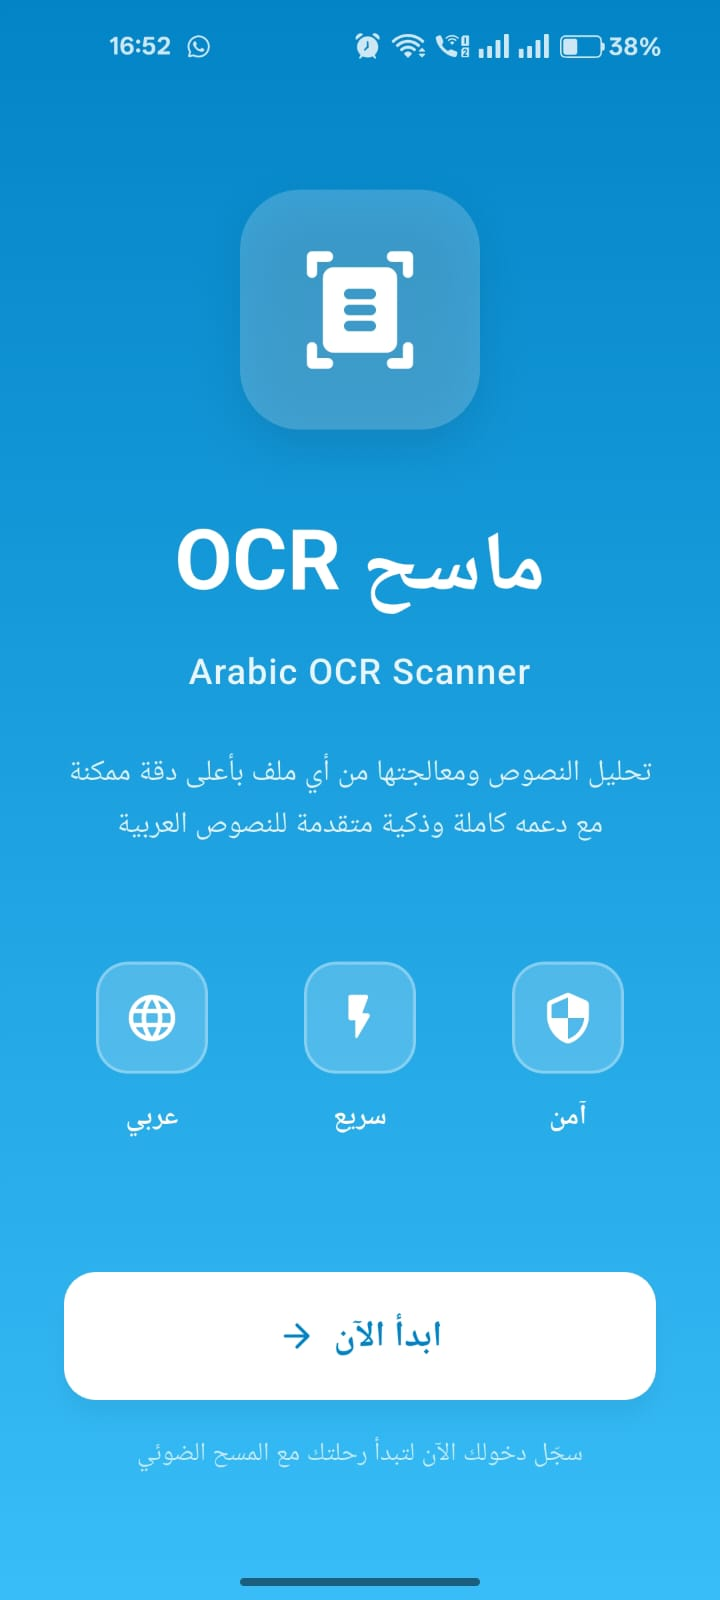

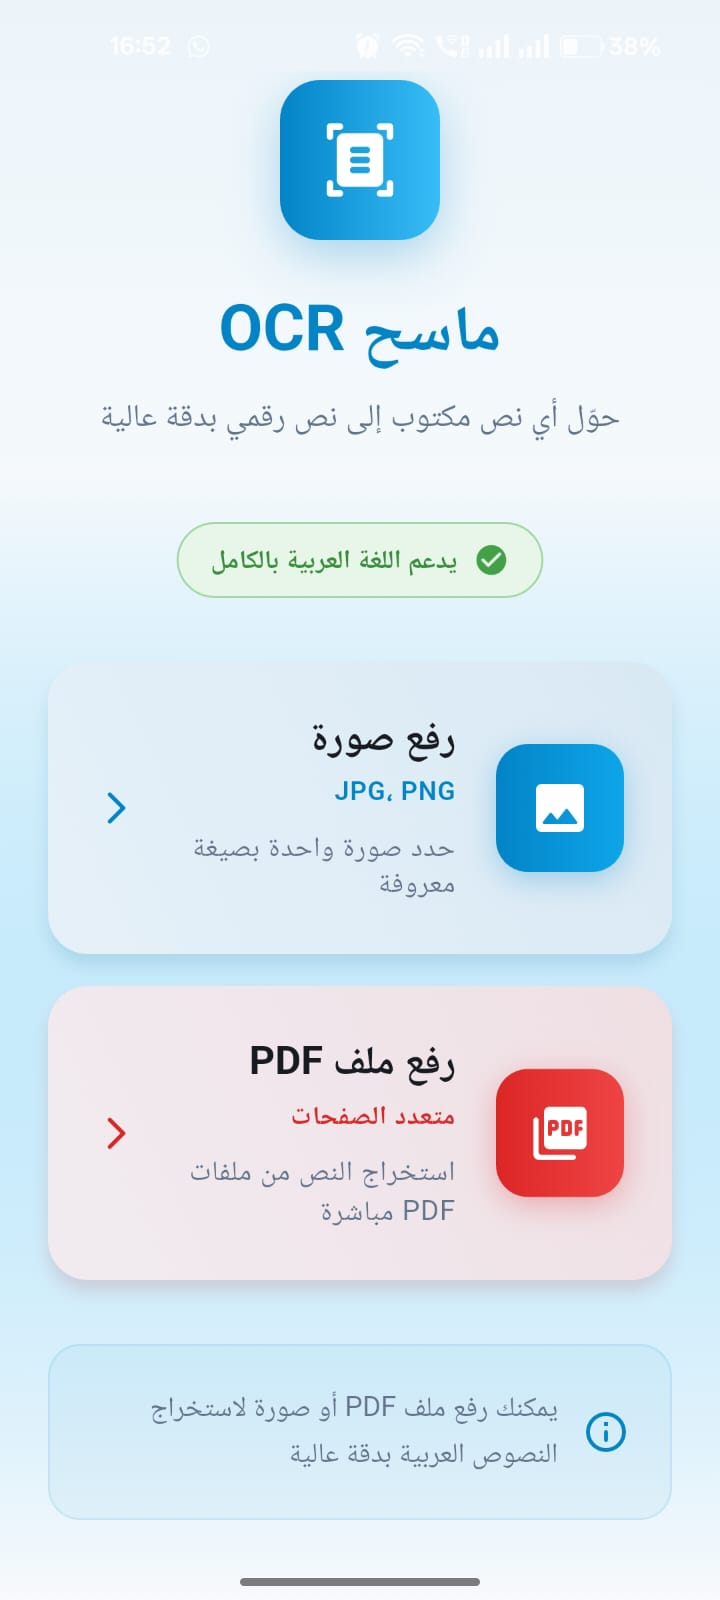

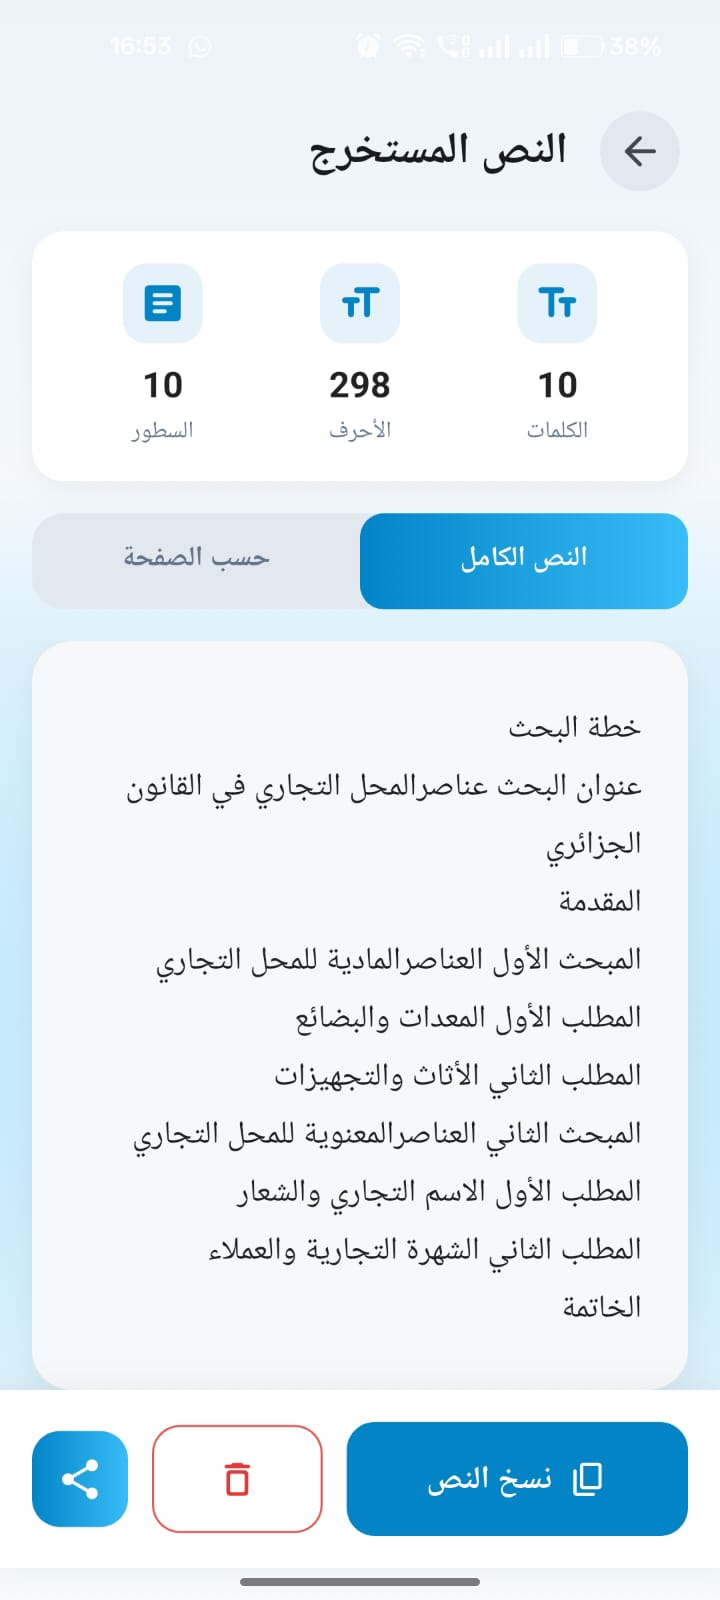

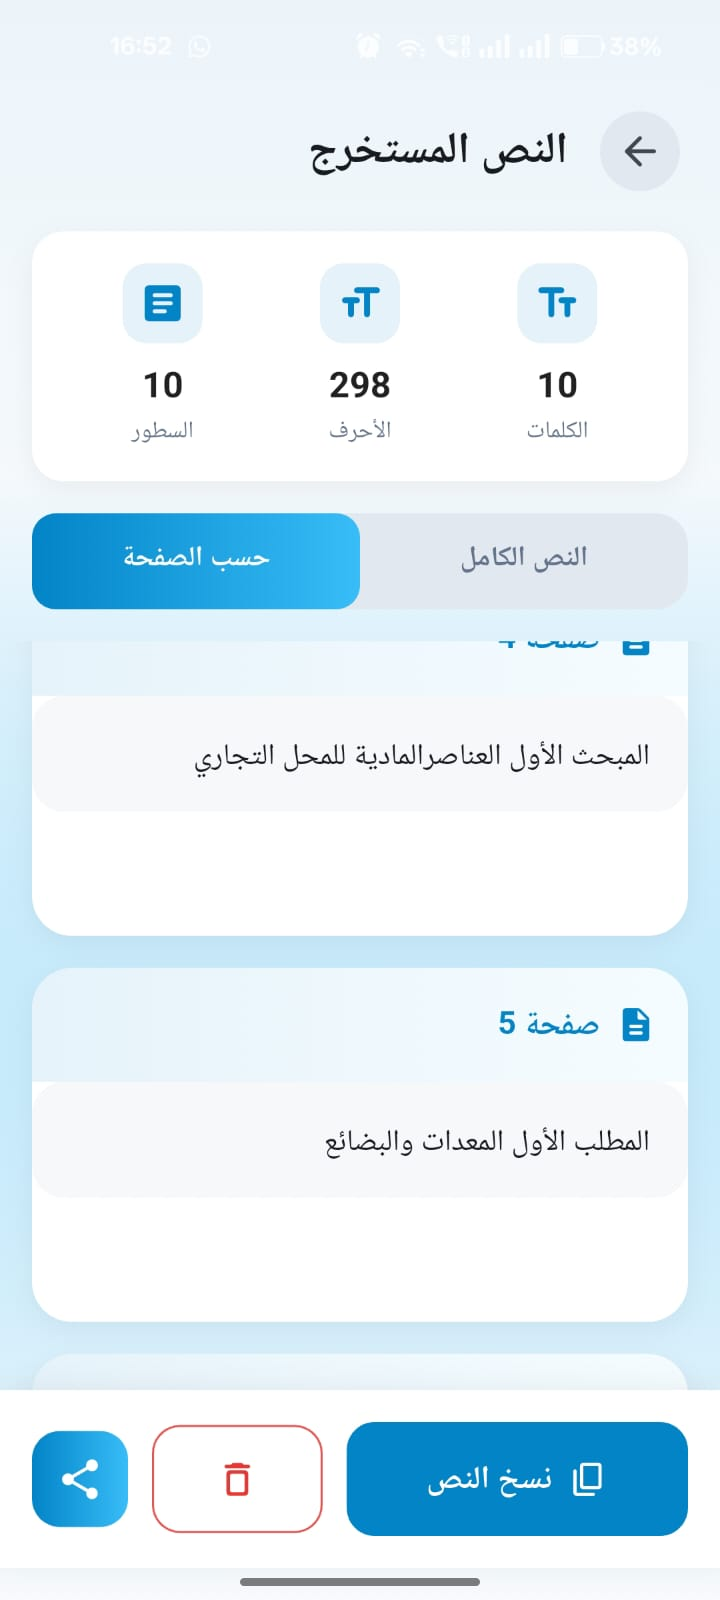